In [16]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from light_curve import create_lc, gp_interpolation
import warnings

In [17]:
%config InlineBackend.figure_format ='retina'
warnings.filterwarnings("ignore")

In [18]:
# ===== SN at work ==== #
# ===================== #

# Details of the object under study
color = 'uvw1-uvv'
B_max = 2455715.82
Object = 'SN2011de'
EB_V_Gal = 0.0256           # Na ID around maximum (Turatto 2003)
EB_V_Gal_err = 0.0004  
EB_V_Host = 0.00                # Schlafly & Finkbeiner 2011
EB_V_Host_err = 0.00

In [19]:
object_dir = '/Users/anirbandutta/Dropbox/SNIa_sample/SN_UVLC/'

uv_mag = object_dir + '2011de_SOUSA.asc'

save_results = '/Users/anirbandutta/Dropbox/SNIa_sample/SN_UVLC/LC_params/'


In [20]:
def plot_params(ax, ml_x, mil_x, ml_y, mil_y, invert=False):
    
        '''
        Remarks: Plotting parameters
        ax: axis object
        ml_x: major locator 'x'
        mil_x: minor locator 'x'
        ml_y: major locator 'y'
        mil_y: minor locator 'y'
        invert: Bool for the y-axis to be inverted 
    
        '''
    
        if invert:
            ax.invert_yaxis()
        
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 12, width = 2.0, labelsize = 12)
        ax.tick_params(axis = 'both', which = 'minor', direction = 'in', length = 6, width = 1.2, labelsize = 12)
        ax.xaxis.set_major_locator(MultipleLocator(ml_x))
        ax.xaxis.set_minor_locator(MultipleLocator(mil_x))
        ax.yaxis.set_major_locator(MultipleLocator(ml_y))
        ax.yaxis.set_minor_locator(MultipleLocator(mil_y))

In [21]:
lc = create_lc(uv_mag)

In [22]:
uvmag_df = lc.get_swift_lc()[0]
uvmag_df['JD'] = uvmag_df['JD'].apply(lambda x: x + 2400000.5)
uvmag_df['JD'] = uvmag_df['JD'].round(0)
uvmag_df = uvmag_df.dropna()

uvmag_df['FILTER'] = uvmag_df['FILTER'].replace('UVW2', 'uvw2')
uvmag_df['FILTER'] = uvmag_df['FILTER'].replace('UVW1', 'uvw1')
uvmag_df['FILTER'] = uvmag_df['FILTER'].replace('UVM2', 'uvm2')
uvmag_df['FILTER'] = uvmag_df['FILTER'].replace('U', 'uvu')
uvmag_df['FILTER'] = uvmag_df['FILTER'].replace('B', 'uvb')
uvmag_df['FILTER'] = uvmag_df['FILTER'].replace('V', 'uvv')

print (uvmag_df)

           JD FILTER     MAG   MERR
0   2455710.0   uvw2  16.829  0.077
1   2455712.0   uvw2  16.987  0.076
2   2455719.0   uvw2  17.799  0.082
3   2455721.0   uvw2  17.995  0.085
4   2455723.0   uvw2  18.297  0.088
..        ...    ...     ...    ...
74  2455731.0    uvv  16.316  0.064
75  2455733.0    uvv  16.251  0.062
76  2455756.0    uvv  17.476  0.093
77  2455761.0    uvv  17.484  0.108
78  2455777.0    uvv  18.082  0.146

[77 rows x 4 columns]


In [23]:
color_df = lc.color(uvmag_df, color=color, ebv_Gal=EB_V_Gal, ebv_Gerr=EB_V_Gal_err,
                   ebv_host=EB_V_Host, ebv_herr=EB_V_Host_err, ext_cor=True, host=True)

In [24]:
color_df['Phase'] = color_df['JD'].apply(lambda x: x - B_max)

In [25]:
color_df.to_csv(save_results + Object + '_' + color+'.txt', sep=' ', float_format='%.3f')

In [26]:
list_uv_colors = sorted(glob.glob(save_results + '*uvw1-uvv'+'*.txt'))
print (list_uv_colors)

name_list = []

for file_name in list_uv_colors:
    color_file = file_name.split('/')[-1]
    object_name = color_file.split('_')[0]
    name_list.append(object_name)
    
print (name_list)

['/Users/anirbandutta/Dropbox/SNIa_sample/SN_UVLC/LC_params/SN2005cf_uvw1-uvv.txt', '/Users/anirbandutta/Dropbox/SNIa_sample/SN_UVLC/LC_params/SN2009dc_uvw1-uvv.txt', '/Users/anirbandutta/Dropbox/SNIa_sample/SN_UVLC/LC_params/SN2009ig_uvw1-uvv.txt', '/Users/anirbandutta/Dropbox/SNIa_sample/SN_UVLC/LC_params/SN2011aa_uvw1-uvv.txt', '/Users/anirbandutta/Dropbox/SNIa_sample/SN_UVLC/LC_params/SN2011de_uvw1-uvv.txt', '/Users/anirbandutta/Dropbox/SNIa_sample/SN_UVLC/LC_params/SN2011fe_uvw1-uvv.txt', '/Users/anirbandutta/Dropbox/SNIa_sample/SN_UVLC/LC_params/SN2012cg_uvw1-uvv.txt', '/Users/anirbandutta/Dropbox/SNIa_sample/SN_UVLC/LC_params/SN2012dn_uvw1-uvv.txt']
['SN2005cf', 'SN2009dc', 'SN2009ig', 'SN2011aa', 'SN2011de', 'SN2011fe', 'SN2012cg', 'SN2012dn']


(-1.0, 4.0)

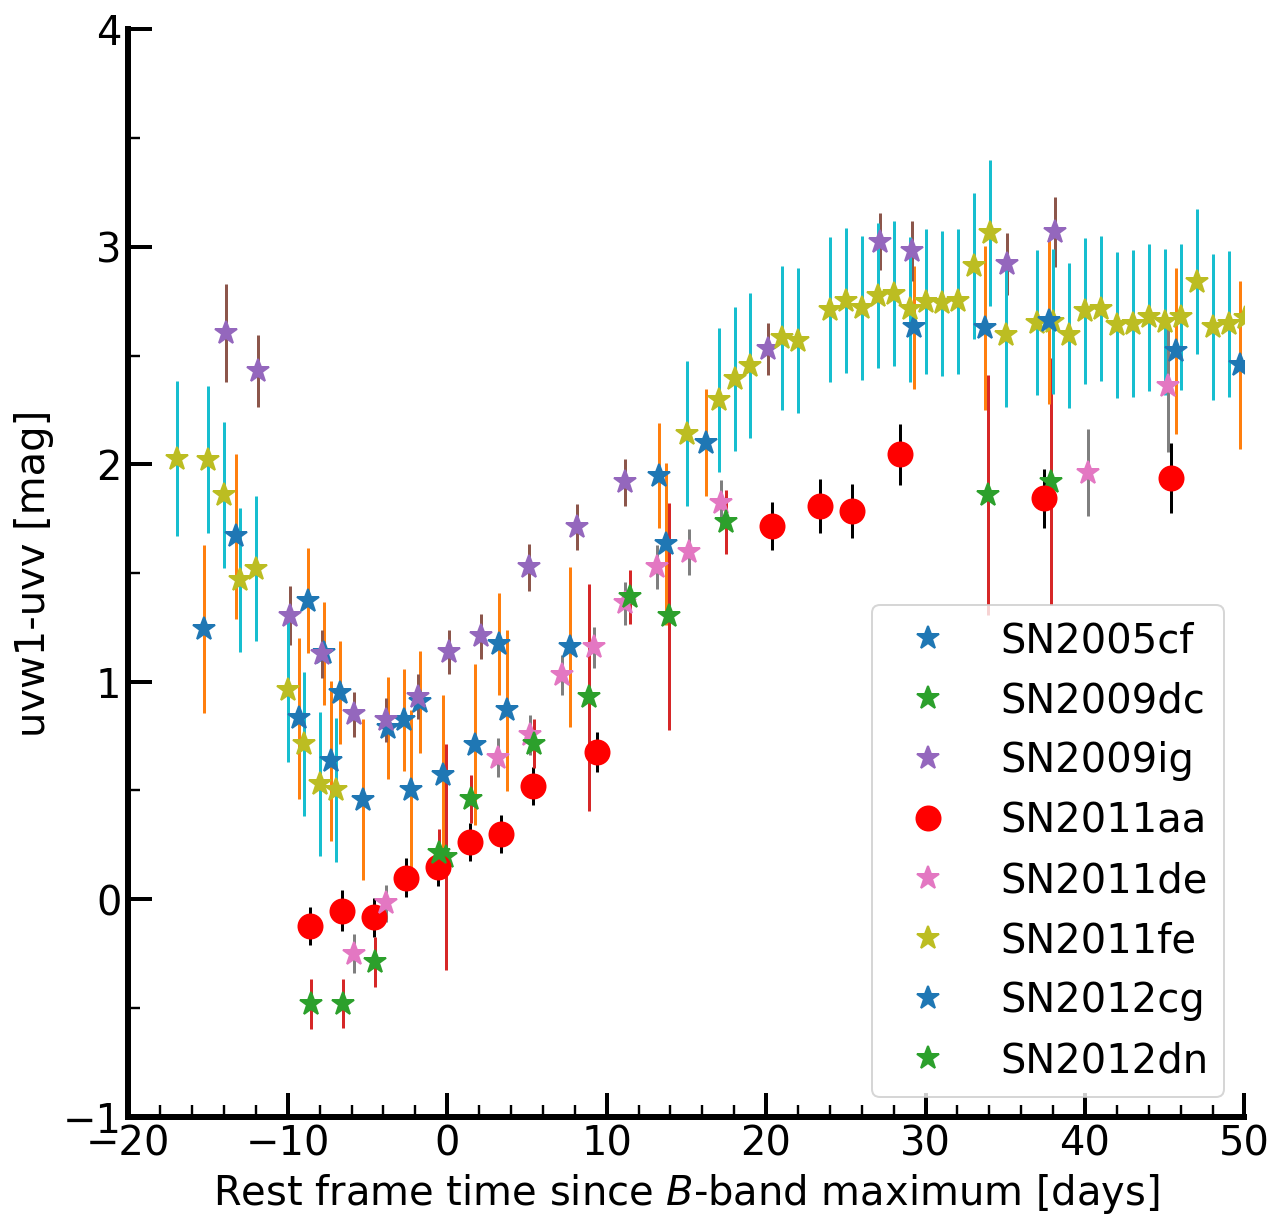

In [32]:
fig_app = plt.figure(figsize = (10, 10))
ax = fig_app.add_subplot(111)
legend_properties = {'size':18, 'weight':'book'}
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.linewidth'] = 3
plot_params(ax, 10, 2, 1, 0.5, invert=False)
# ax.set_ylim(21.0, 11.5)


col_names = ['JD', 'uvw1', 'uvw1Err', 'uvv', 'uvvErr', 'uvw1ex', 'uvw1exErr', 'uvvex', 
             'uvvexErr', 'uvw1-uvv', 'uvw1-uvvErr', 'Phase']
 
for j in range(len(list_uv_colors)):
    object_name = list_uv_colors[j].split('/')[-1].split('_')[0]
    sn_color_df = pd.read_csv(list_uv_colors[j], sep='\s+', engine='python')
    if object_name in ['SN2011aa']:
        ax.plot(sn_color_df['Phase'], sn_color_df['uvw1-uvv'], 'o', label=name_list[j], ms=12,
               color='red')
        ax.errorbar(sn_color_df['Phase'], sn_color_df['uvw1-uvv'], yerr=sn_color_df['uvw1-uvvErr'],
                   fmt='', ls='', color='black')
    else:
        ax.plot(sn_color_df['Phase'], sn_color_df['uvw1-uvv'], '*', label=name_list[j], ms=12)
        ax.errorbar(sn_color_df['Phase'], sn_color_df['uvw1-uvv'], yerr=sn_color_df['uvw1-uvvErr'],
                   fmt='', ls='')
    

ax.set_xlabel(r'Rest frame time since $B$-band maximum [days]', fontsize = 20)
ax.set_ylabel(r'uvw1-uvv [mag]', fontsize = 20)
ax.legend(fontsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize = 20)
    
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize = 20)
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)        
ax.set_xlim(-20, 50)
ax.set_ylim(-1, 4)

In [28]:
list_opt_colors = sorted(glob.glob(save_results + '*uvb-uvv'+'*.txt'))
print (list_opt_colors)

name_list_opt = []

for file_name in list_opt_colors:
    color_file = file_name.split('/')[-1]
    object_name = color_file.split('_')[0]
    name_list_opt.append(object_name)
    
print (name_list_opt)

['/Users/anirbandutta/Dropbox/SNIa_sample/SN_UVLC/LC_params/SN2005cf_uvb-uvv.txt', '/Users/anirbandutta/Dropbox/SNIa_sample/SN_UVLC/LC_params/SN2009dc_uvb-uvv.txt', '/Users/anirbandutta/Dropbox/SNIa_sample/SN_UVLC/LC_params/SN2009ig_uvb-uvv.txt', '/Users/anirbandutta/Dropbox/SNIa_sample/SN_UVLC/LC_params/SN2011aa_uvb-uvv.txt', '/Users/anirbandutta/Dropbox/SNIa_sample/SN_UVLC/LC_params/SN2011de_uvb-uvv.txt', '/Users/anirbandutta/Dropbox/SNIa_sample/SN_UVLC/LC_params/SN2011fe_uvb-uvv.txt', '/Users/anirbandutta/Dropbox/SNIa_sample/SN_UVLC/LC_params/SN2012cg_uvb-uvv.txt', '/Users/anirbandutta/Dropbox/SNIa_sample/SN_UVLC/LC_params/SN2012dn_uvb-uvv.txt']
['SN2005cf', 'SN2009dc', 'SN2009ig', 'SN2011aa', 'SN2011de', 'SN2011fe', 'SN2012cg', 'SN2012dn']


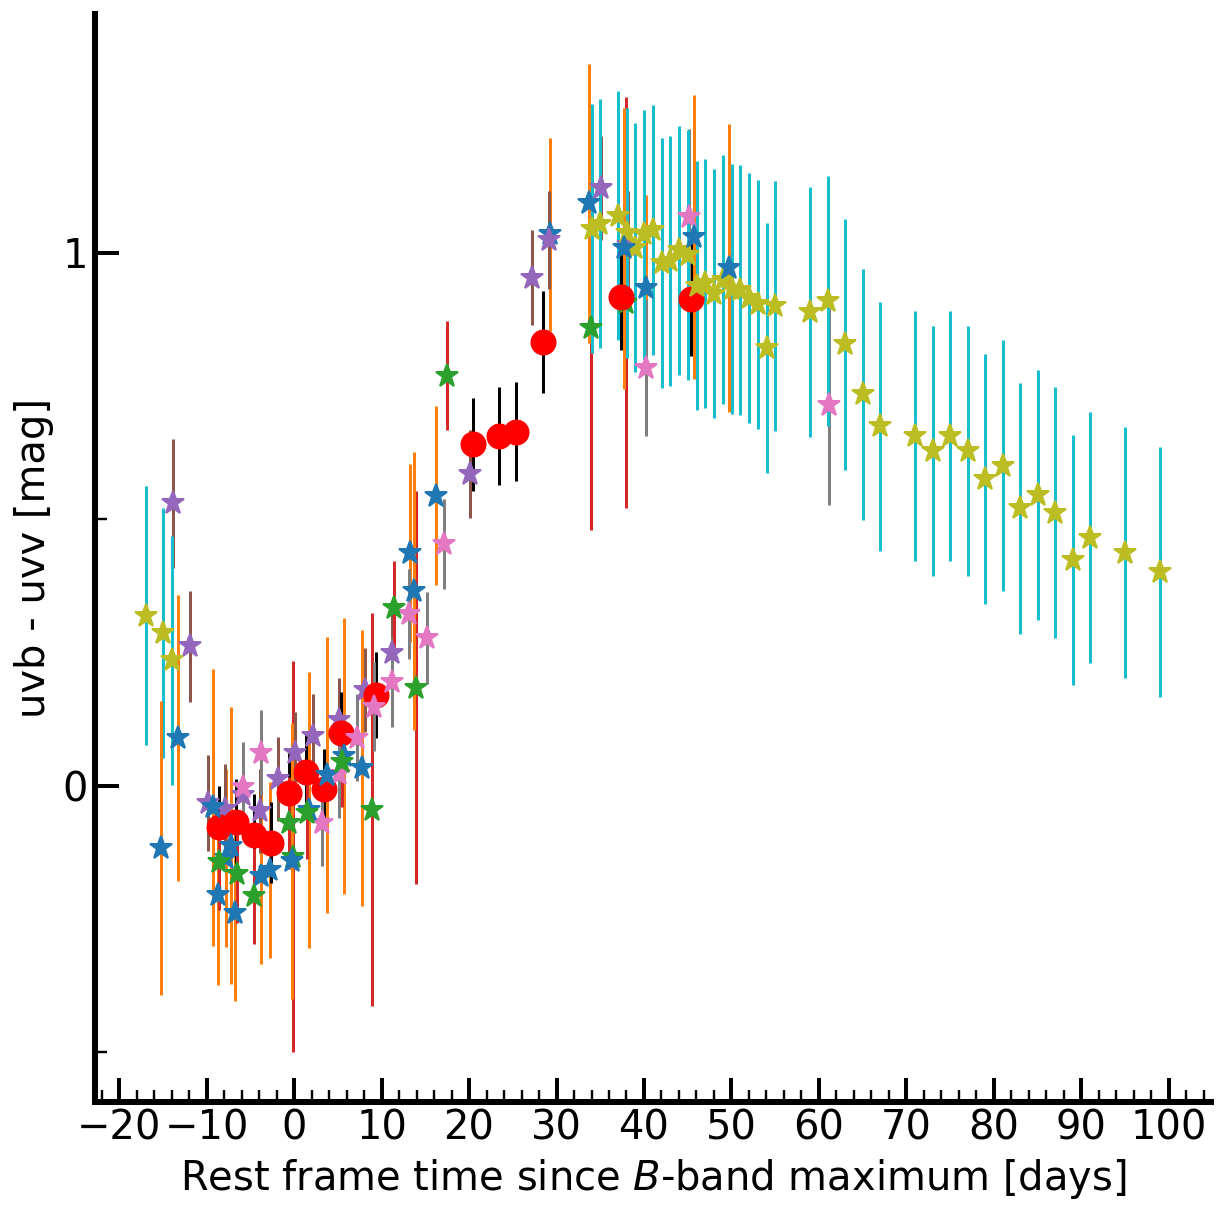

In [29]:
fig_app = plt.figure(figsize = (10, 10))
ax = fig_app.add_subplot(111)
legend_properties = {'size':18, 'weight':'book'}
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.linewidth'] = 3
plot_params(ax, 10, 2, 1, 0.5, invert=False)
# ax.set_ylim(21.0, 11.5)


col_names = ['JD', 'uvb', 'uvb', 'uvv', 'uvvErr', 'uvbex', 'uvbexErr', 'uvvex', 
             'uvvexErr', 'uvb-uvv', 'uvb-uvvErr', 'Phase']

for j in range(len(list_opt_colors)):
    object_name = list_opt_colors[j].split('/')[-1].split('_')[0]
    sn_color_df = pd.read_csv(list_opt_colors[j], sep='\s+', engine='python')
    if object_name in ['SN2011aa']:
        ax.plot(sn_color_df['Phase'], sn_color_df['uvb-uvv'], 'o', label=name_list[j], ms=12,
               color='red')
        ax.errorbar(sn_color_df['Phase'], sn_color_df['uvb-uvv'], yerr=sn_color_df['uvb-uvvErr'],
                   fmt='', ls='', color='black')
    else:
        ax.plot(sn_color_df['Phase'], sn_color_df['uvb-uvv'], '*', label=name_list[j], ms=12)
        ax.errorbar(sn_color_df['Phase'], sn_color_df['uvb-uvv'], yerr=sn_color_df['uvb-uvvErr'],
                   fmt='', ls='')
    

ax.set_xlabel(r'Rest frame time since $B$-band maximum [days]', fontsize = 20)
ax.set_ylabel('uvb - uvv [mag]', fontsize = 20)

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize = 20)
    
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize = 20)
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)        



In [30]:
# b-v / r-i
# 